**Import Libaries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

**Load Dataset**

In [43]:
adverts_data = pd.read_csv('adverts.csv')

In [3]:
adverts_data.head()

public_reference   mileage reg_code standard_colour standard_make  \
0   202006039777689       0.0      NaN            Grey         Volvo   
1   202007020778260  108230.0       61            Blue        Jaguar   
2   202007020778474    7800.0       17            Grey         SKODA   
3   202007080986776   45000.0       16           Brown      Vauxhall   
4   202007161321269   64000.0       64            Grey    Land Rover   

      standard_model vehicle_condition  year_of_registration  price  \
0               XC90               NEW                   NaN  73970   
1                 XF              USED                2011.0   7000   
2               Yeti              USED                2017.0  14000   
3              Mokka              USED                2016.0   7995   
4  Range Rover Sport              USED                2015.0  26995   

   body_type  crossover_car_and_van              fuel_type  
0        SUV                  False  Petrol Plug-in Hybrid  
1     Saloon                  False                 Diesel  
2        SUV                  False                 Petrol  
3  Hatchback                  False                 Diesel  
4        SUV                  False                 Diesel

In [4]:
adverts_data.columns

Index(['public_reference', 'mileage', 'reg_code', 'standard_colour',
       'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'price', 'body_type', 'crossover_car_and_van',
       'fuel_type'],
      dtype='object')

In [5]:
adverts_data.shape

(402005, 12)

In [6]:
adverts_data.describe().T

count          mean           std           min  \
public_reference      402005.0  2.020071e+14  1.691662e+10  2.013072e+14   
mileage               401878.0  3.774360e+04  3.483172e+04  0.000000e+00   
year_of_registration  368694.0  2.015006e+03  7.962667e+00  9.990000e+02   
price                 402005.0  1.734197e+04  4.643746e+04  1.200000e+02   

                               25%           50%           75%           max  
public_reference      2.020090e+14  2.020093e+14  2.020102e+14  2.020110e+14  
mileage               1.048100e+04  2.862950e+04  5.687575e+04  9.999990e+05  
year_of_registration  2.013000e+03  2.016000e+03  2.018000e+03  2.020000e+03  
price                 7.495000e+03  1.260000e+04  2.000000e+04  9.999999e+06

In [7]:
adverts_data.shape

(402005, 12)

### Grouping List Of Feature

In [8]:
categorical_features = []
numerical_features = []
for i in adverts_data.columns:
    if adverts_data[i].dtype=='O':
        categorical_features.append(i)
    else:
        numerical_features.append(i)

In [9]:
categorical_features

['reg_code',
 'standard_colour',
 'standard_make',
 'standard_model',
 'vehicle_condition',
 'body_type',
 'fuel_type']

In [10]:
numerical_features

['public_reference',
 'mileage',
 'year_of_registration',
 'price',
 'crossover_car_and_van']

### Checking For Null Values

In [11]:
adverts_data.isnull().sum()

public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

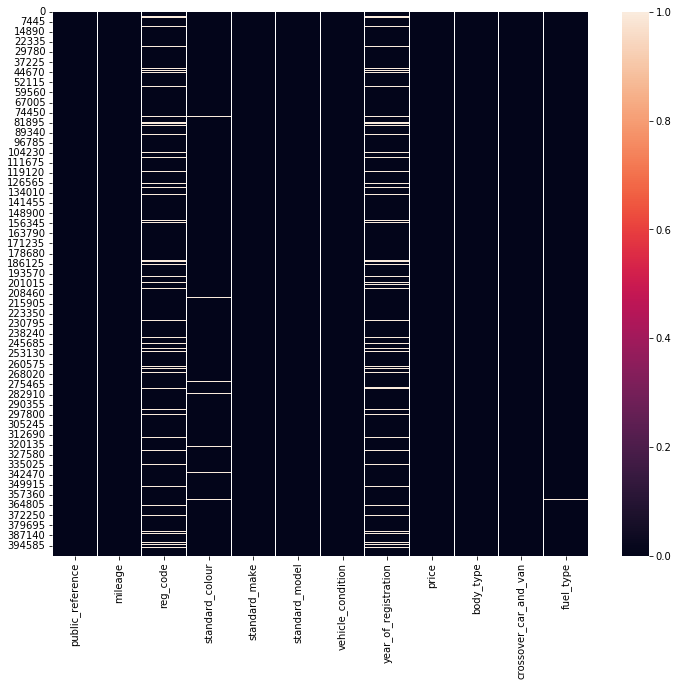

In [12]:
fig,ax = plt.subplots(figsize=(12,10))
sns.heatmap(adverts_data.isnull())

### Checking For Potential Outliers

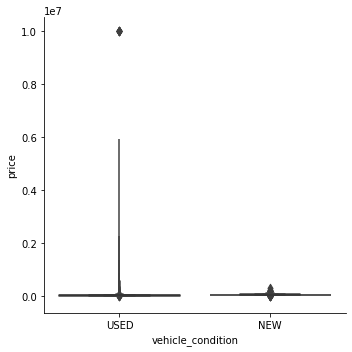

In [13]:
sns.catplot(
    data=adverts_data.sort_values("price"),
    x="vehicle_condition", y="price", kind="boxen")
ax.set(yscale='log')
plt.show()

(array([ 800., 1000., 1200., 1400., 1600., 1800., 2000., 2200.]),
 <a list of 8 Text yticklabel objects>)

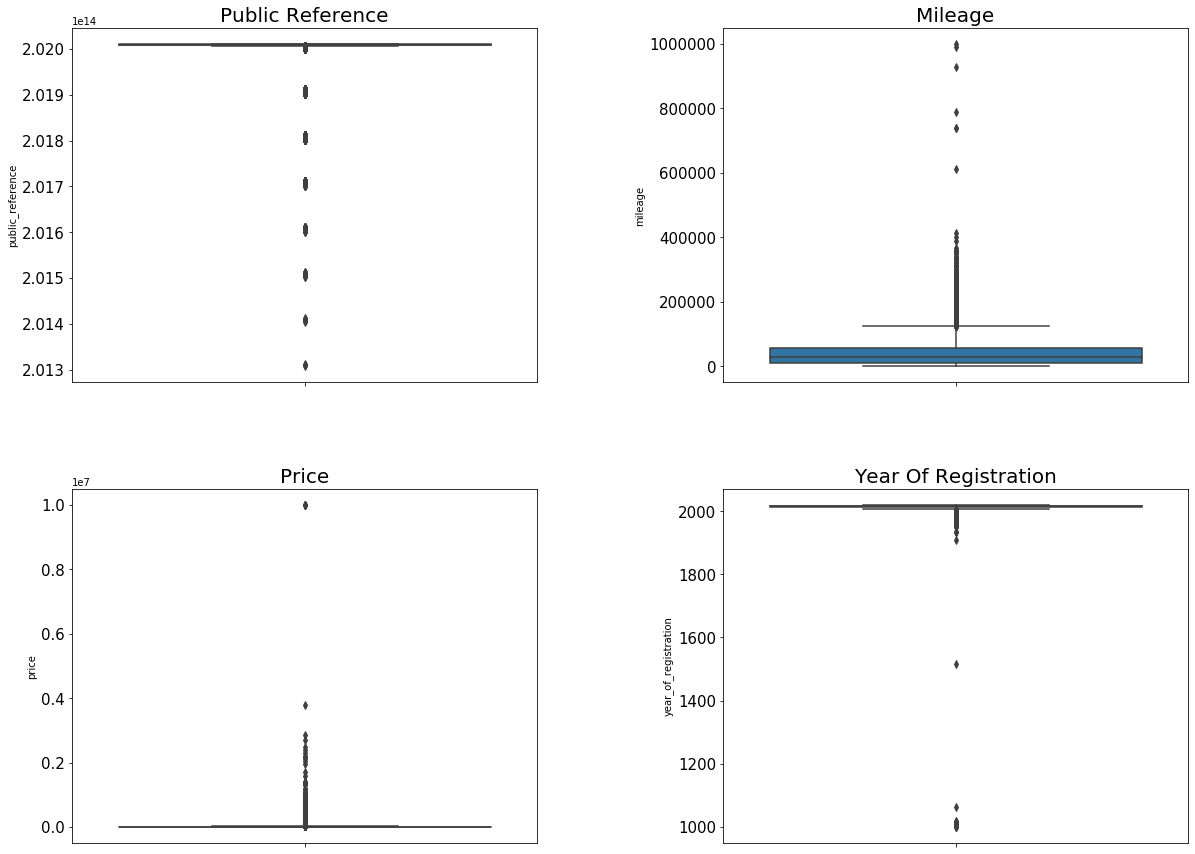

In [14]:
grid = plt.GridSpec(2, 2, wspace=0.4, hspace=0.3)

fig,ax = plt.subplots(figsize=(20,15))

plt.subplot(grid[0, 0])
plt.title('Public Reference',size=20)
sns.boxplot(y=adverts_data['public_reference'])
plt.xticks(size=15)
plt.yticks(size=15)

plt.subplot(grid[0, 1])
plt.title('Mileage',size=20)
sns.boxplot(y=adverts_data['mileage'])
plt.xticks(size=15)
plt.yticks(size=15)

plt.subplot(grid[1, 0])
plt.title('Price',size=20)
sns.boxplot(y=adverts_data['price'])
plt.xticks(size=15)
plt.yticks(size=15)

plt.subplot(grid[1, 1])
plt.title('Year Of Registration',size=20)
sns.boxplot(y=adverts_data['year_of_registration'])
plt.xticks(size=15)
plt.yticks(size=15)

## Checking Weight Of Outliers

In [15]:
def outlier_detect(feature):
    q1, q3 = adverts_data[feature].quantile(0.25),adverts_data[feature].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    percentage_1 = len(adverts_data[adverts_data[feature]>upper_bound])/len(adverts_data) * 100
    percentage_2 = len(adverts_data[adverts_data[feature]<lower_bound])/len(adverts_data) * 100
    
    print('Lower Bound:',lower_bound,'Upper Bound:',upper_bound)
    print(percentage_1,percentage_2)

In [16]:
outlier_detect('price'),outlier_detect('mileage'),outlier_detect('year_of_registration')

Lower Bound: -11262.5 Upper Bound: 38757.5
6.534495839603985 0.0
Lower Bound: -59111.125 Upper Bound: 126467.875
2.0350493153070235 0.0
Lower Bound: 2005.5 Upper Bound: 2025.5
0.0 2.9638934839118916


(None, None, None)

In [17]:
q1, q3 = adverts_data['year_of_registration'].quantile(0.25),adverts_data['year_of_registration'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

percentage = (len(adverts_data[adverts_data['year_of_registration']<lower_bound])/len(adverts_data)) * 100
    
print('Lower Bound:',lower_bound,'Upper Bound:',upper_bound)
print(percentage)

Lower Bound: 2005.5 Upper Bound: 2025.5
2.9638934839118916


In [18]:
for col in categorical_features:
    print(col)
    print(adverts_data[col].nunique(),'\n')

reg_code
72 

standard_colour
22 

standard_make
110 

standard_model
1168 

vehicle_condition
2 

body_type
16 

fuel_type
9 



In [19]:
for col in categorical_features:
    print(col)
    print(adverts_data[col].value_counts(),'\n')

reg_code
17        36738
67        32230
66        25227
69        23825
18        21613
          ...  
723xuu        1
FW            1
m             1
85            1
p             1
Name: reg_code, Length: 72, dtype: int64 

standard_colour
Black          86287
White          70535
Grey           68227
Blue           59784
Silver         49323
Red            42024
Green           4534
Orange          4088
Yellow          2097
Brown           2014
Multicolour     1854
Beige           1539
Bronze          1330
Purple          1211
Gold             818
Pink             410
Turquoise        307
Maroon           159
Burgundy          63
Magenta           15
Navy               7
Indigo             1
Name: standard_colour, dtype: int64 

standard_make
BMW               37376
Audi              35280
Volkswagen        34246
Vauxhall          33700
Mercedes-Benz     31917
                  ...  
Bristol               1
Wolseley              1
Pagani                1
International         1
Cu

### Handling Missing Values

In [34]:
def handle_missing_values_for_cat(feature,data):
    
    mode = data[feature].mode()
    new_column = data[feature].fillna(mode[0])
    
    return new_column

In [35]:
adverts_data['standard_colour'] = handle_missing_values_for_cat('standard_colour',adverts_data)
adverts_data['body_type'] = handle_missing_values_for_cat('body_type',adverts_data)
adverts_data['fuel_type'] = handle_missing_values_for_cat('fuel_type',adverts_data)

In [36]:
mean = adverts_data['mileage'].mean()
adverts_data['mileage'] = adverts_data['mileage'].fillna(mean)

mean = adverts_data['year_of_registration'].mean()
adverts_data['year_of_registration'] = adverts_data['year_of_registration'].fillna(mean)

## Handling Outliers

In [44]:
len(adverts_data)

402005

In [52]:
q3_mil = adverts_data['mileage'].quantile(0.75)
q1_mil = adverts_data['mileage'].quantile(0.25)
iqr_mil = q3_mil - q1_mil

upper_bound_mil = q1 + 1.5 * iqr_mil

q3_price = adverts_data['price'].quantile(0.75)
q1_price = adverts_data['price'].quantile(0.25)
iqr_price = q3_price - q1_price

upper_bound_price = q1 + 1.5 * iqr_price

adverts_data = adverts_data[(adverts_data['mileage']<upper_bound_mil) & (adverts_data['price']<upper_bound_price)]

(array([ 800., 1000., 1200., 1400., 1600., 1800., 2000., 2200.]),
 <a list of 8 Text yticklabel objects>)

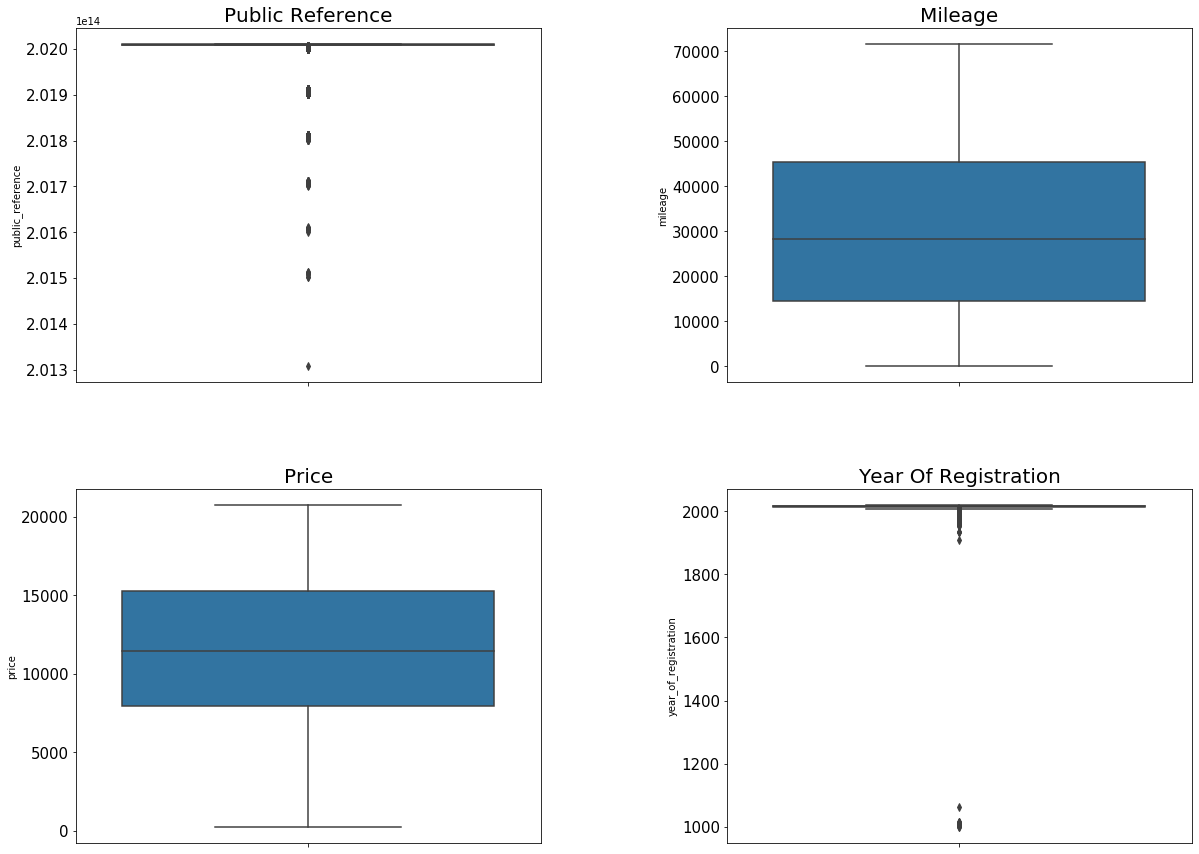

In [53]:
grid = plt.GridSpec(2, 2, wspace=0.4, hspace=0.3)

fig,ax = plt.subplots(figsize=(20,15))

plt.subplot(grid[0, 0])
plt.title('Public Reference',size=20)
sns.boxplot(y=adverts_data['public_reference'])
plt.xticks(size=15)
plt.yticks(size=15)

plt.subplot(grid[0, 1])
plt.title('Mileage',size=20)
sns.boxplot(y=adverts_data['mileage'])
plt.xticks(size=15)
plt.yticks(size=15)

plt.subplot(grid[1, 0])
plt.title('Price',size=20)
sns.boxplot(y=adverts_data['price'])
plt.xticks(size=15)
plt.yticks(size=15)

plt.subplot(grid[1, 1])
plt.title('Year Of Registration',size=20)
sns.boxplot(y=adverts_data['year_of_registration'])
plt.xticks(size=15)
plt.yticks(size=15)

## Subsetting The Data - Random Data Sampling

In [54]:
sample_data = adverts_data.sample(n=100000)

## Data Standardization

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_mileage = scaler.fit_transform(sample_data['mileage'].values.reshape(-1, 1))
scaled_price = scaler.fit_transform(sample_data['price'].values.reshape(-1, 1))

standard_data = sample_data.copy()
standard_data['price'] = scaled_price
standard_data['mileage'] = scaled_mileage

## Checking Distributions

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.,
        16000.]),
 <a list of 9 Text yticklabel objects>)

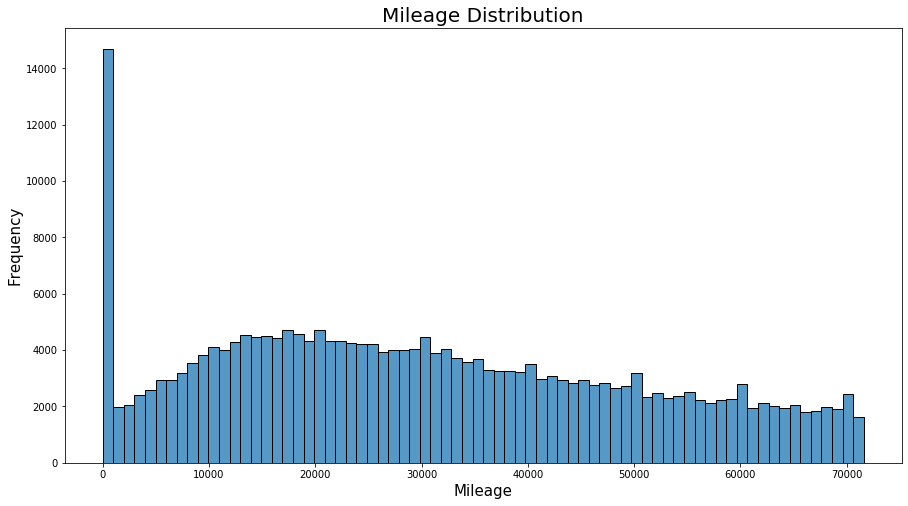

In [57]:
fig,ax = plt.subplots(figsize=(15,8))
plt.title('Mileage Distribution',size=20)
sns.histplot(data=adverts_data['mileage'])
#ax.set(xscale='log')
plt.ylabel('Frequency',size=15)
plt.xticks(size=10)
plt.xlabel('Mileage',size=15)
plt.yticks(size=10)

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.]),
 <a list of 9 Text yticklabel objects>)

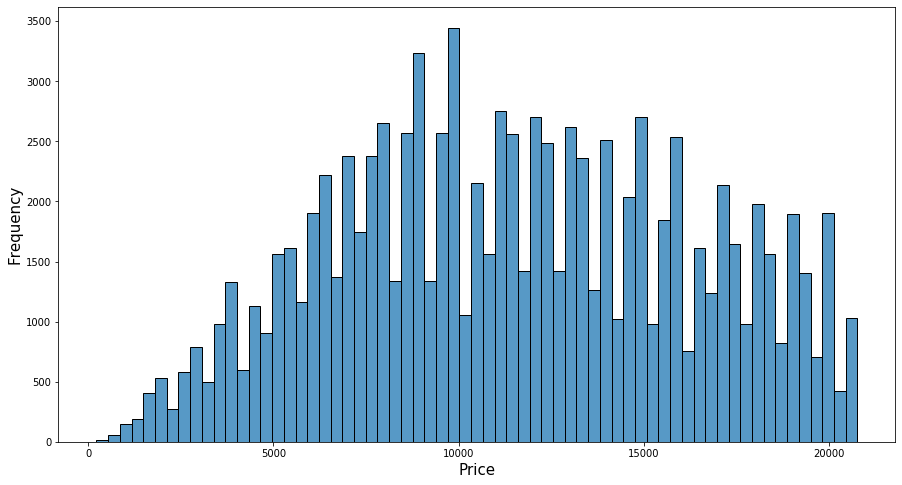

In [58]:
fig,ax = plt.subplots(figsize=(15,8))
sns.histplot(data=sample_data['price'])
#ax.set(xscale='log')
plt.ylabel('Frequency',size=15)
plt.xticks(size=10)
plt.xlabel('Price',size=15)
plt.yticks(size=10)

### Categorical

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text yticklabel objects>)

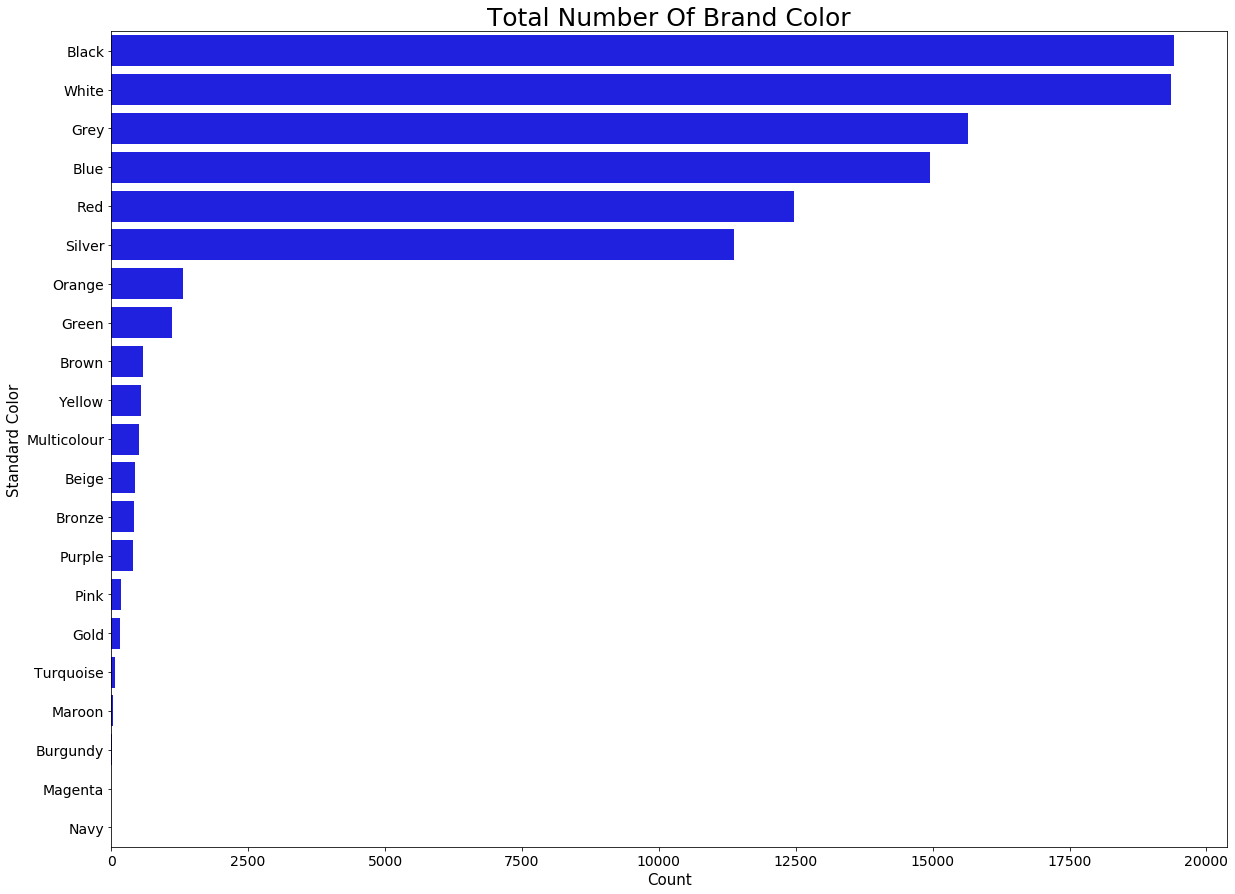

In [59]:
fig,ax = plt.subplots(figsize=(20,15))
sns.countplot(data=sample_data, y='standard_colour', color='blue',
              order = sample_data['standard_colour'].value_counts().index)
plt.title('Total Number Of Brand Color',size=25)
plt.ylabel('Standard Color',size=15)
plt.xlabel('Count',size=15)
plt.xticks(size=14)
plt.yticks(size=14)

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.]),
 <a list of 7 Text yticklabel objects>)

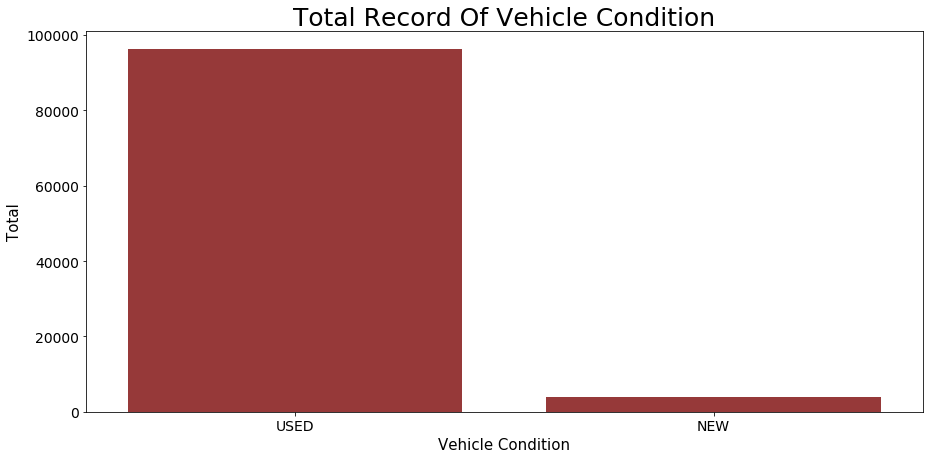

In [60]:
fig,ax = plt.subplots(figsize=(15,7))
sns.countplot(data=sample_data, x='vehicle_condition',color='brown', 
              order = sample_data['vehicle_condition'].value_counts().index)

plt.title('Total Record Of Vehicle Condition',size=25)
plt.ylabel('Total',size=15)
plt.xlabel('Vehicle Condition',size=15)
plt.xticks(size=14)
plt.yticks(size=14)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text yticklabel objects>)

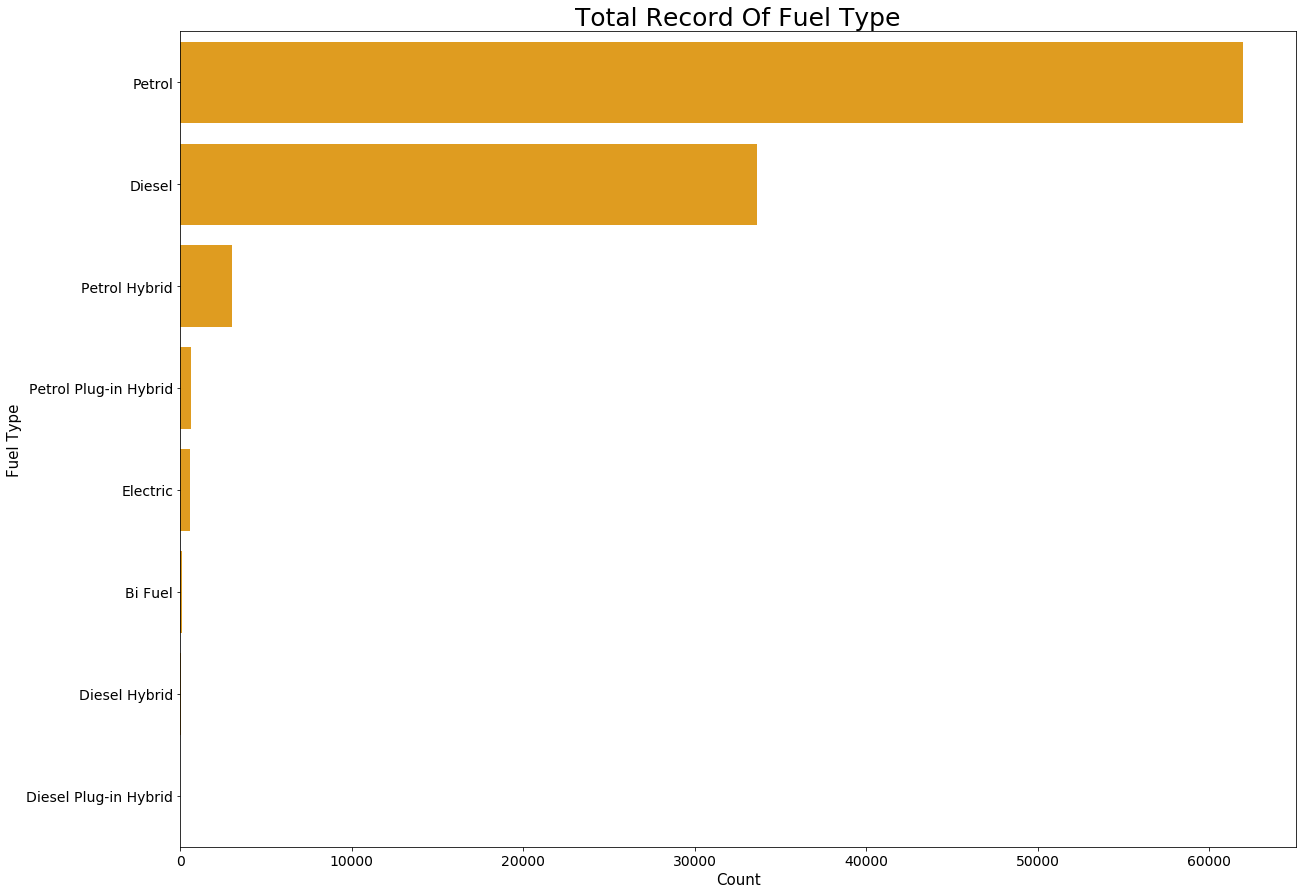

In [61]:
fig,ax = plt.subplots(figsize=(20,15))
sns.countplot(data=sample_data,y='fuel_type',color='orange',
              order = sample_data['fuel_type'].value_counts().index)

plt.title('Total Record Of Fuel Type',size=25)
plt.ylabel('Fuel Type',size=15)
plt.xlabel('Count',size=15)
plt.xticks(size=14)
plt.yticks(size=14)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text yticklabel objects>)

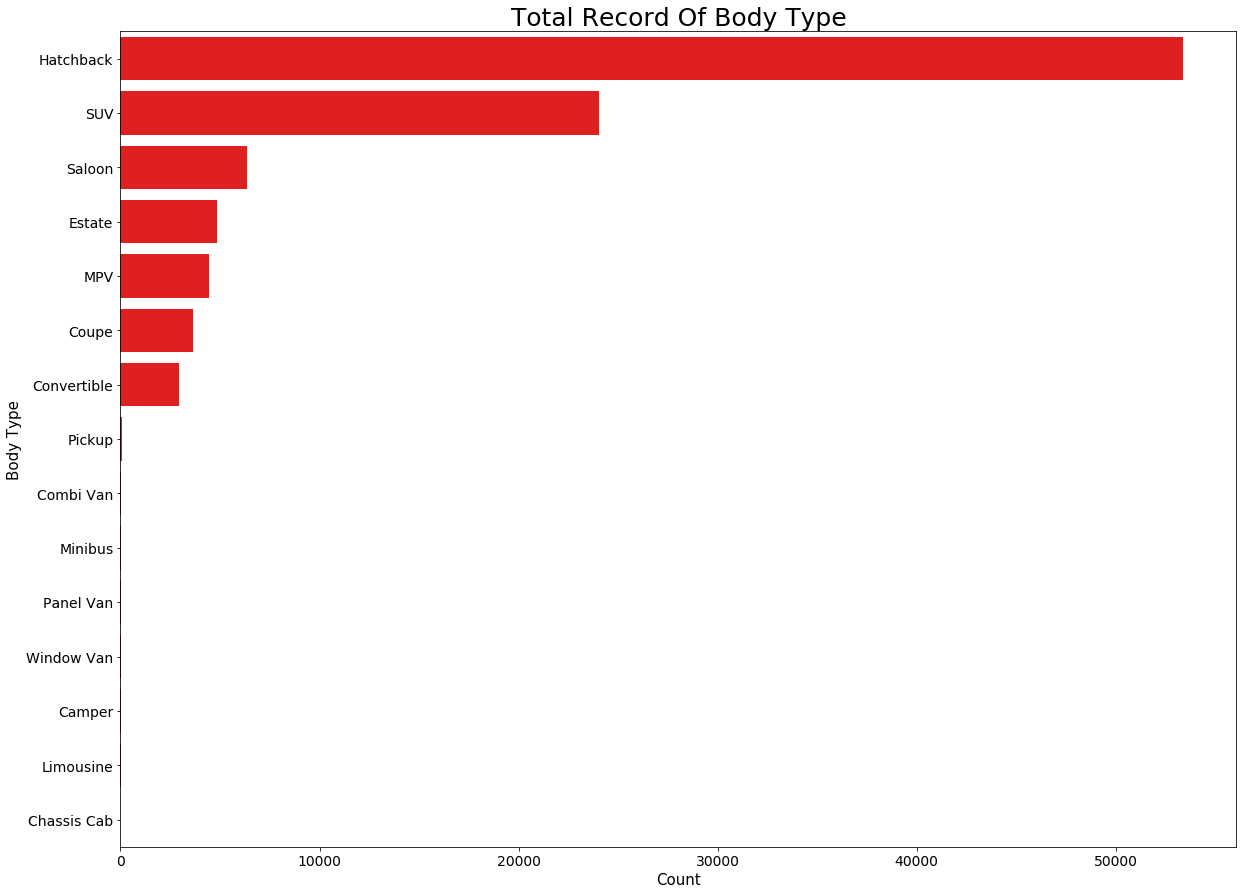

In [62]:
fig,ax = plt.subplots(figsize=(20,15))
sns.countplot(data=sample_data,y='body_type',color='red', 
              order = sample_data['body_type'].value_counts().index)

plt.title('Total Record Of Body Type',size=25)
plt.ylabel('Body Type',size=15)
plt.xlabel('Count',size=15)
plt.xticks(size=14)
plt.yticks(size=14)

### Catgeorical Variable Correspondence With Price Feature

In [63]:
adverts_data.head()

public_reference  mileage reg_code standard_colour standard_make  \
2    202007020778474   7800.0       17            Grey         SKODA   
3    202007080986776  45000.0       16           Brown      Vauxhall   
6    202007080998445  24075.0       17             Red      Vauxhall   
11   202007161303602  24487.0       17           Black       Peugeot   
12   202009173867934   4765.0       69           White         SKODA   

   standard_model vehicle_condition  year_of_registration  price  body_type  \
2            Yeti              USED                2017.0  14000        SUV   
3           Mokka              USED                2016.0   7995  Hatchback   
6            Viva              USED                2017.0   5861  Hatchback   
11            208              USED                2017.0   8795  Hatchback   
12        Octavia              USED                2019.0  16990     Estate   

    crossover_car_and_van fuel_type  
2                   False    Petrol  
3                   False    Diesel  
6                   False    Petrol  
11                  False    Petrol  
12                  False    Petrol

In [64]:
adverts_data['body_type'].nunique()

15

In [65]:
order = adverts_data.groupby(["body_type"])["price"].mean().sort_values().index

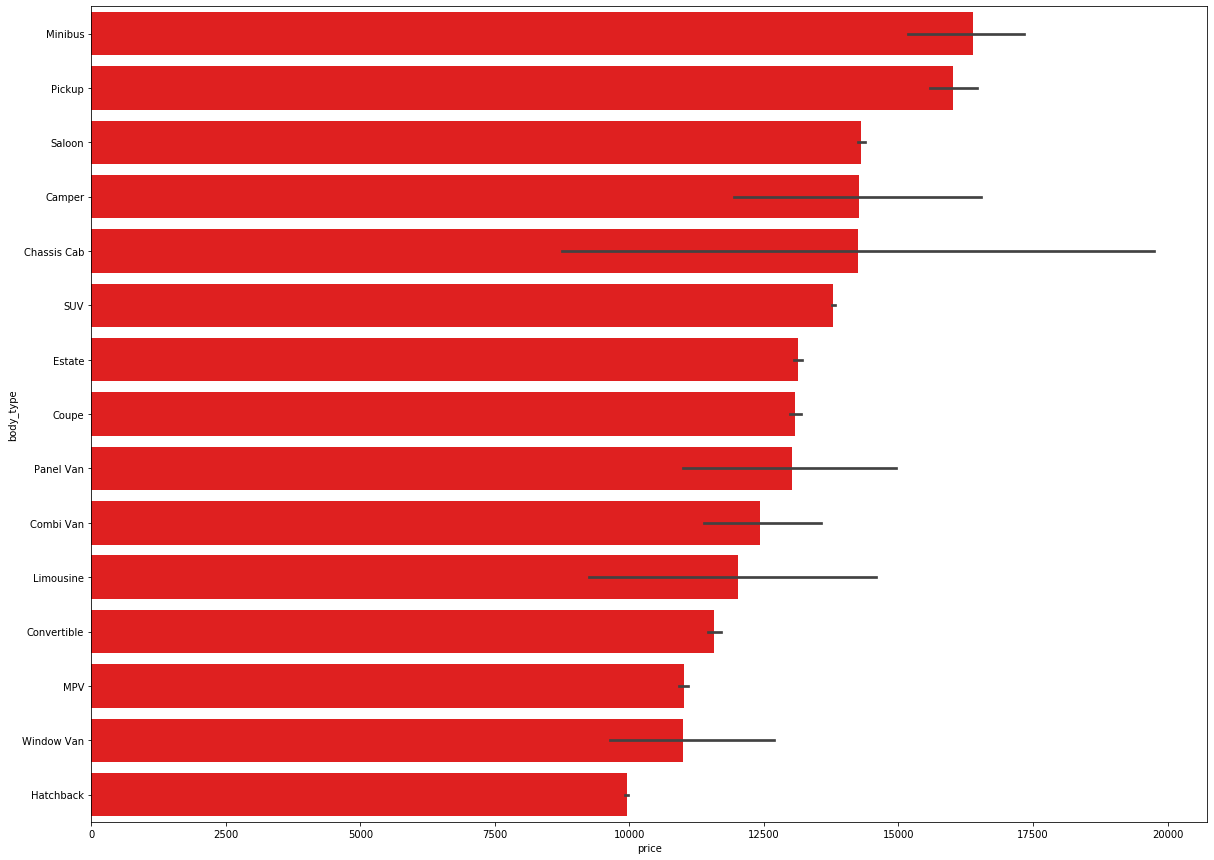

In [68]:
fig,ax = plt.subplots(figsize=(20,15))

order = adverts_data.groupby(["body_type"])["price"].mean().sort_values(ascending=False).index

sns.barplot(data=adverts_data,y='body_type',x='price',color='red',order=order)

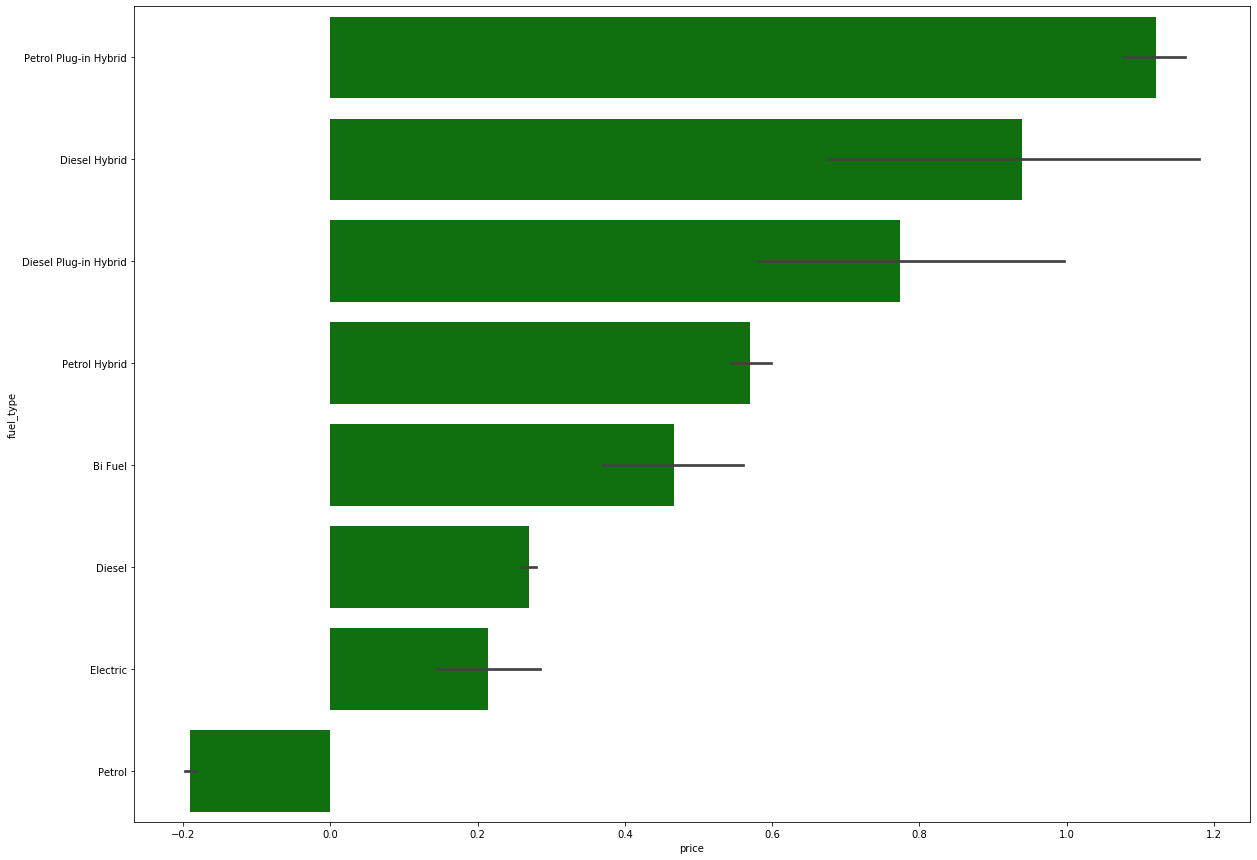

In [69]:
fig,ax = plt.subplots(figsize=(20,15))

order = standard_data.groupby(["fuel_type"])["price"].mean().sort_values(ascending=False).index

sns.barplot(data=standard_data,y='fuel_type',x='price',color='green',
            order=order)

Text(0.5, 0, 'Price')

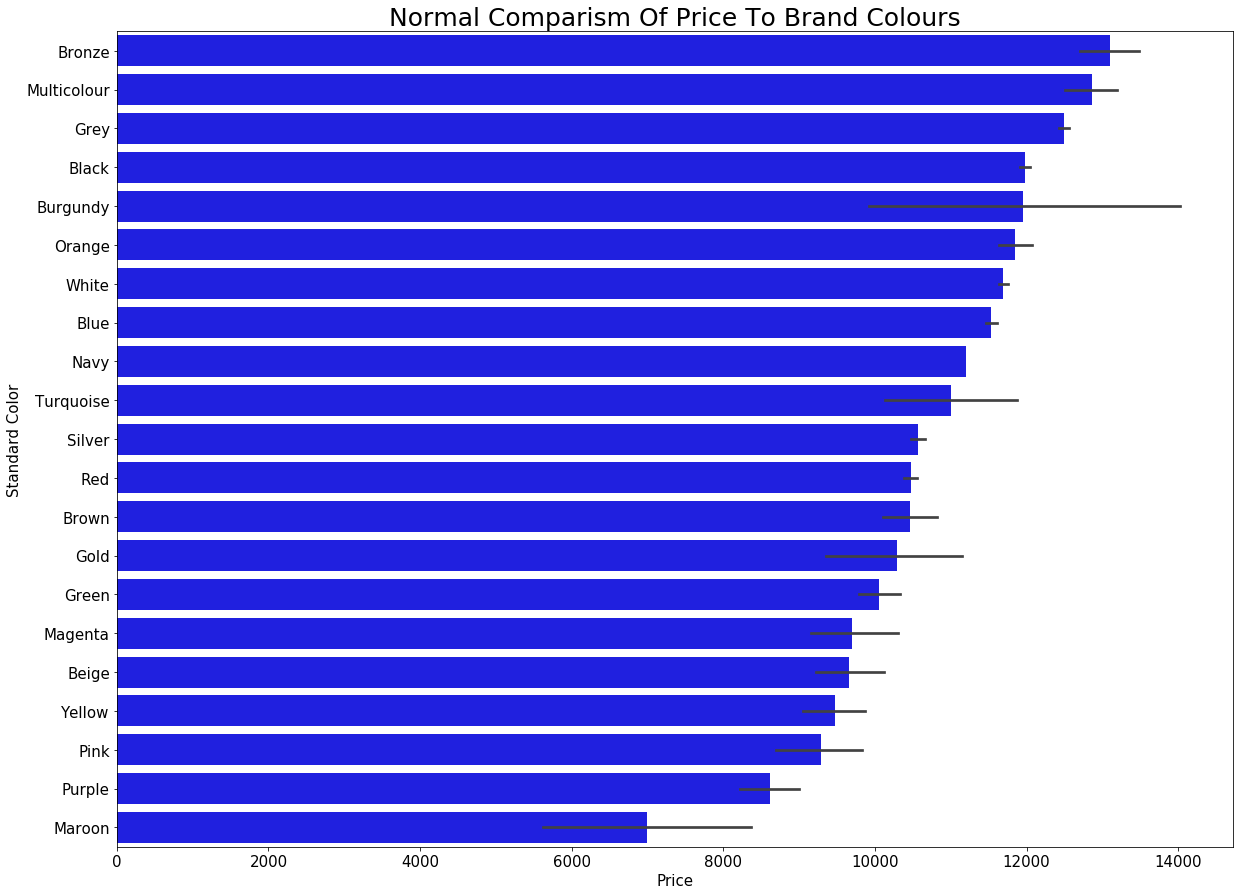

In [70]:
fig,ax = plt.subplots(figsize=(20,15))

order = sample_data.groupby(["standard_colour"])["price"].mean().sort_values(ascending=False).index

sns.barplot(data=sample_data,y='standard_colour',x='price',color='blue',
            order=order)

plt.title('Normal Comparism Of Price To Brand Colours',size=25)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel('Standard Color',size=15)
plt.xlabel('Price',size=15)

Text(0.5, 0, 'Price')

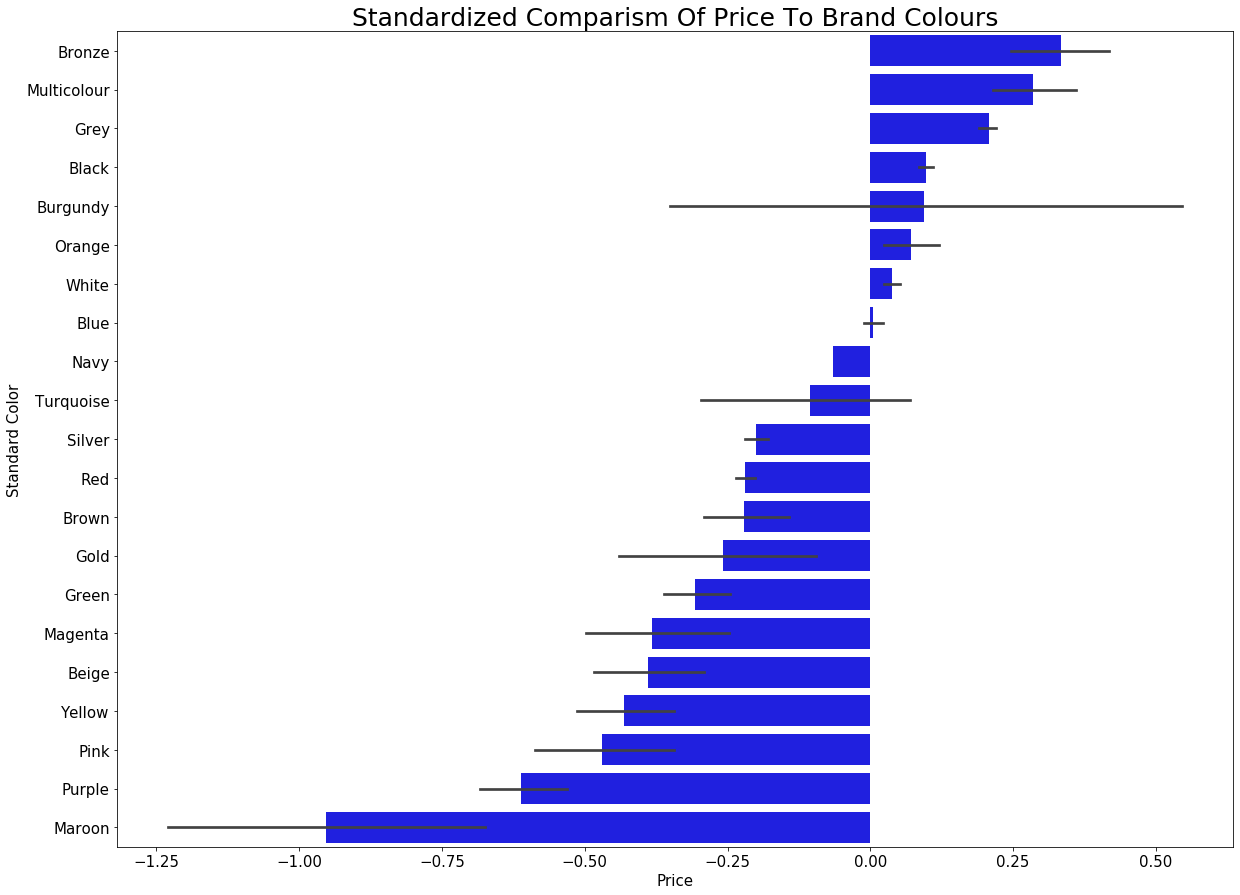

In [71]:
fig,ax = plt.subplots(figsize=(20,15))

order = standard_data.groupby(["standard_colour"])["price"].mean().sort_values(ascending=False).index

sns.barplot(data=standard_data,y='standard_colour',x='price',color='blue',
            order=order)

plt.title('Standardized Comparism Of Price To Brand Colours',size=25)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel('Standard Color',size=15)
plt.xlabel('Price',size=15)

Text(0, 0.5, 'Price')

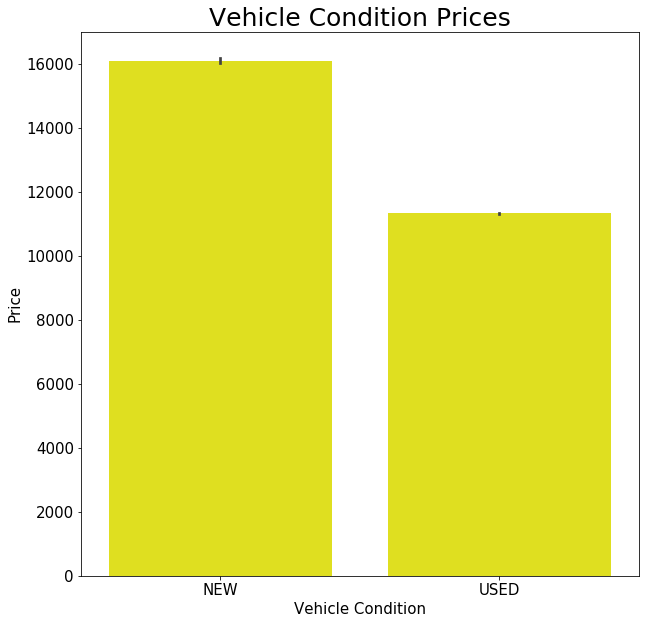

In [72]:
fig,ax = plt.subplots(figsize=(10,10))

order = sample_data.groupby(["vehicle_condition"])["price"].mean().sort_values(ascending=False).index

sns.barplot(data=sample_data,x='vehicle_condition',y='price',color='yellow',
            order=order)

plt.title('Vehicle Condition Prices',size=25)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('Vehicle Condition',size=15)
plt.ylabel('Price',size=15)

## Correlation Between Mileage and Car

Text(0, 0.5, 'Price')

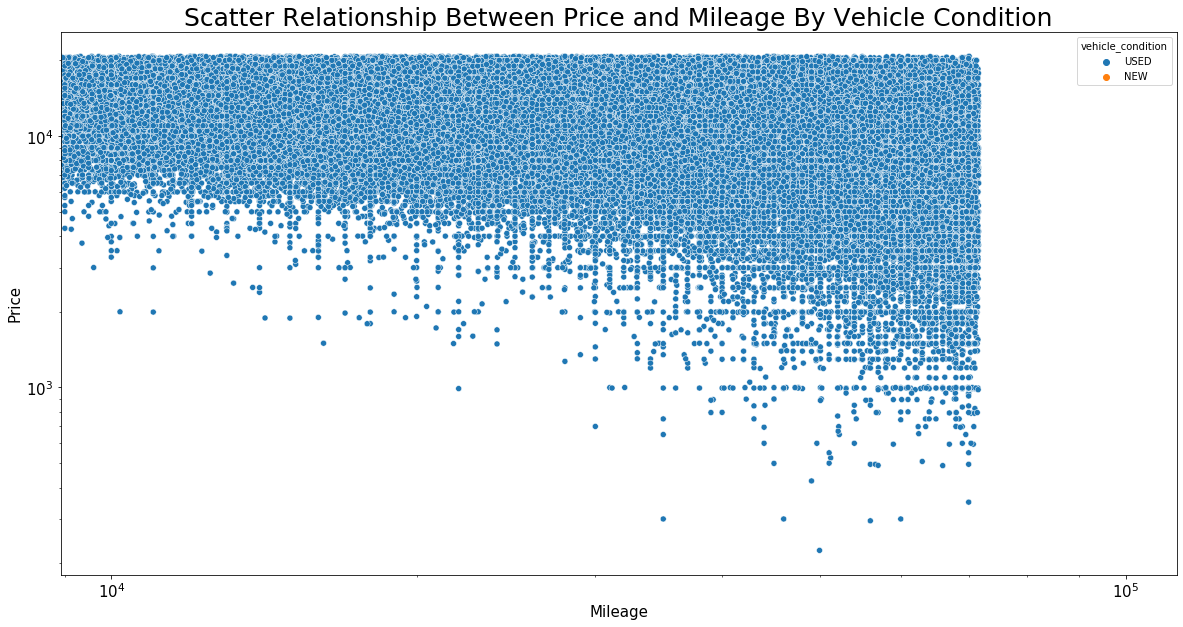

In [77]:
fig,ax = plt.subplots(figsize=(20,10))
plt.title('Scatter Relationship Between Price and Mileage By Vehicle Condition',size=25)
sns.scatterplot(x='mileage',y='price',data=sample_data,hue='vehicle_condition')

ax.set(xscale='log')
ax.set(yscale='log')

plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('Mileage',size=15)
plt.ylabel('Price',size=15)

Text(0, 0.5, 'Price')

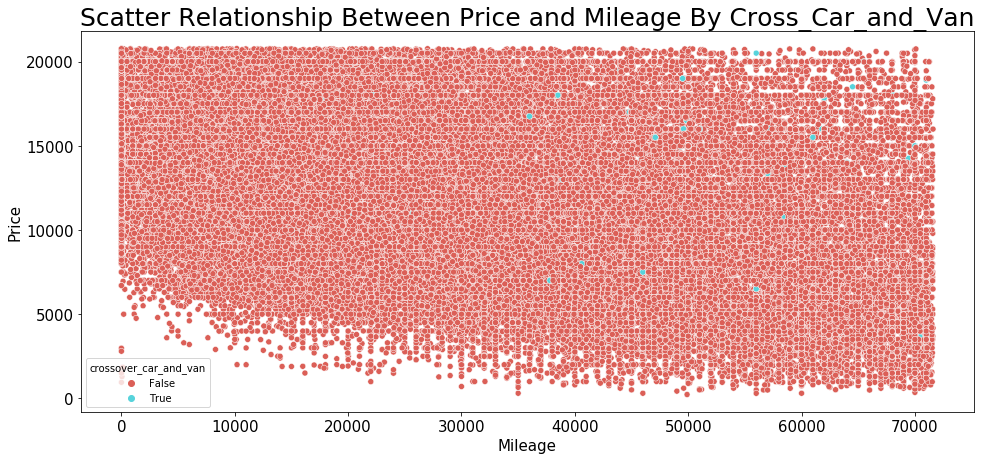

In [75]:
plt.figure(figsize=(16,7))
plt.title('Scatter Relationship Between Price and Mileage By Cross_Car_and_Van',size=25)
sns.scatterplot(x='mileage',y='price',hue='crossover_car_and_van',palette=sns.color_palette("hls",2),data=sample_data,
               legend="full")
#ax.set(yscale='log')

plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('Mileage',size=15)
plt.ylabel('Price',size=15)

Text(0, 0.5, 'Price')

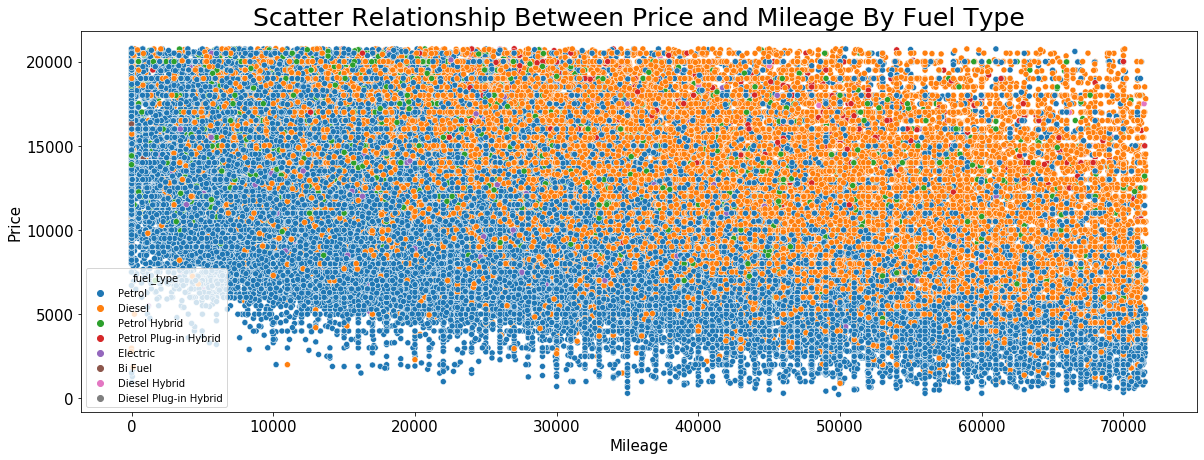

In [78]:
plt.figure(figsize=(20,7))
plt.title('Scatter Relationship Between Price and Mileage By Fuel Type',size=25)
sns.scatterplot(x='mileage', y='price',hue='fuel_type',data=sample_data,
               legend="full")
ax.set(yscale='log')

plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('Mileage',size=15)
plt.ylabel('Price',size=15)

In [79]:
corr = sample_data.corr()
results = corr['price'].sort_values(ascending=False)
pd.DataFrame(results)

price
price                  1.000000
year_of_registration   0.194956
crossover_car_and_van  0.035254
public_reference      -0.039588
mileage               -0.414592

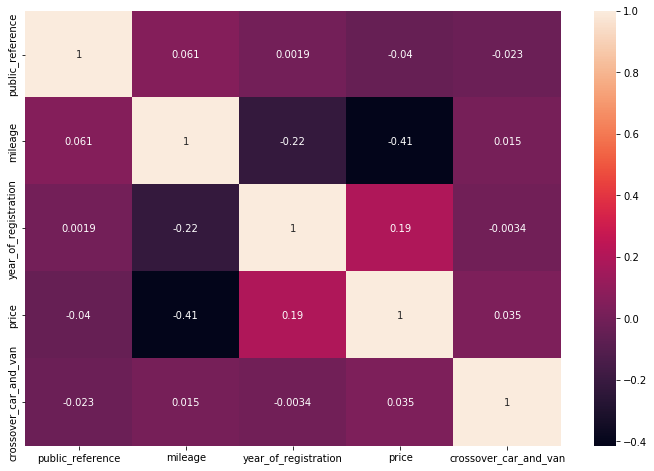

In [80]:
fig,ax= plt.subplots(figsize=(12,8))
sns.heatmap(sample_data.corr(),annot=True)

## Price Limits Analysis

In [ ]:
adverts_data['price'].describe()

In [ ]:
top_adverts_data = sample_data.sort_values(by='price', ascending=False)[:int(0.1*(len(sample_data)))]
bottom_adverts_data = sample_data.sort_values(by='price', ascending=True)[:int(0.1*(len(sample_data)))]

## Analysis Of Top Price Categories

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
sns.countplot(data = top_adverts_data, x='vehicle_condition',color='black')

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
sns.barplot(data = top_adverts_data, x='vehicle_condition',color='black',y='price')

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
sns.countplot(data = bottom_adverts_data, x='vehicle_condition',color='black')

In [ ]:
fig,ax = plt.subplots(figsize=(25,10))
sns.countplot(data = adverts_data, x='standard_colour',color='black',
              order = adverts_data['standard_colour'].value_counts().index)

In [ ]:
adverts_data.head()

## Bivariate and Multivariate Analysis

In [ ]:
top_adverts_data.pivot_table(index='standard_colour',
                   aggfunc={'price':'mean','reg_code':'count'}).sort_values(by='price',ascending=False).rename(columns={'price':'Total Price',
                                                                                                         'reg_code':'Total Units Registered'})[:10]

In [ ]:
adverts_data.pivot_table(index='standard_make',
                   aggfunc={'price':'mean',
                            'reg_code':'count'}).sort_values(by=['price','reg_code'],
                                                                    ascending=False).rename(columns={'price':'Average Price',
                                                                                                         'reg_code':'Total Units Registered'})[:int(0.1*(len(adverts_data)))]

In [ ]:
adverts_data.info()

In [ ]:
fig,ax = plt.subplots(figsize=(15,10))
sns.countplot(data = top_adverts_data, x='standard_colour', hue = 'vehicle_condition', 
              order = top_adverts_data['standard_colour'].value_counts().index)

### Impact Of Vehicle Condition On Registration

In [ ]:
adverts_data.pivot_table(index='body_type',columns=['vehicle_condition'],aggfunc={'price':'mean','reg_code':'count'})

In [ ]:
adverts_data.groupby(['vehicle_condition','body_type'])['mileage','price'].mean()

## Data Distribution Across Years

In [81]:
copy = adverts_data.copy()

In [82]:
copy['year_of_registration'].isnull().sum()/len(copy['year_of_registration']) * 100

4.265093228696379

In [83]:
copy['year_of_registration'].describe()

count    230073.000000
mean       2015.608946
std           8.219938
min         999.000000
25%        2014.000000
50%        2016.000000
75%        2018.000000
max        2020.000000
Name: year_of_registration, dtype: float64

In [84]:
len(copy[copy['year_of_registration']<=2013])/len(copy['year_of_registration']) * 100

17.337499947986668

In [85]:
len(copy[(copy['year_of_registration']>=2013) & (copy['year_of_registration']<=2016)])/len(copy['year_of_registration']) * 100

35.7489711762919

In [86]:
len(copy[(copy['year_of_registration']>=2016) & (copy['year_of_registration']<=2018)])/len(copy['year_of_registration']) * 100

49.16216924722145

In [87]:
len(copy[(copy['year_of_registration']>=2018) & (copy['year_of_registration']<=2020)])/len(copy['year_of_registration']) * 100

24.519500838454913

In [88]:
len(copy[copy['year_of_registration']>=2016])/len(copy) * 100

61.92374429413747

In [89]:
copy['year_of_registration'].fillna(2017,inplace=True)

In [90]:
copy[['reg_code','year_of_registration']].head()

reg_code  year_of_registration
2        17                2017.0
3        16                2016.0
6        17                2017.0
11       17                2017.0
12       69                2019.0

In [91]:
copy['year_of_registration'].mode()

0    2017.0
dtype: float64

In [92]:
copy['year_of_registration'] = copy['year_of_registration'].apply(lambda i: int(i))

In [93]:
copy['year_of_registration'].value_counts()

2017    65965
2016    34176
2018    28257
2015    22501
2019    21108
        ...  
1010        1
1934        1
1016        1
1063        1
1015        1
Name: year_of_registration, Length: 74, dtype: int64

In [94]:
yearly_registration = pd.DataFrame(sample_data.groupby('year_of_registration')['reg_code'].count()).reset_index().rename(columns={'reg_code':'Total Registration'})

In [95]:
yearly_registration['year_of_registration'] = yearly_registration['year_of_registration'].apply(lambda i: int(i))

Text(0, 0.5, 'Price')

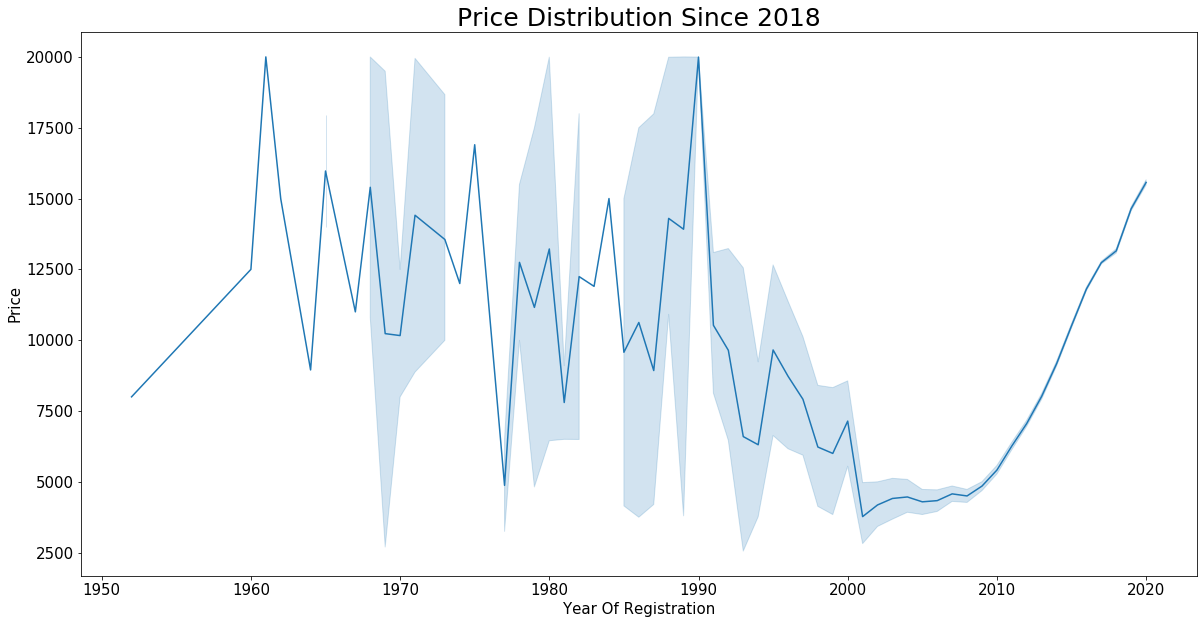

In [96]:
fig,ax = plt.subplots(figsize=(20,10))
plt.title('Price Distribution Since 2018',size=25)
sns.lineplot(x='year_of_registration',y='price',data=sample_data[sample_data['year_of_registration']>=1800])
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('Year Of Registration',size=15)
plt.ylabel('Price',size=15)

Text(0, 0.5, 'Total Registration')

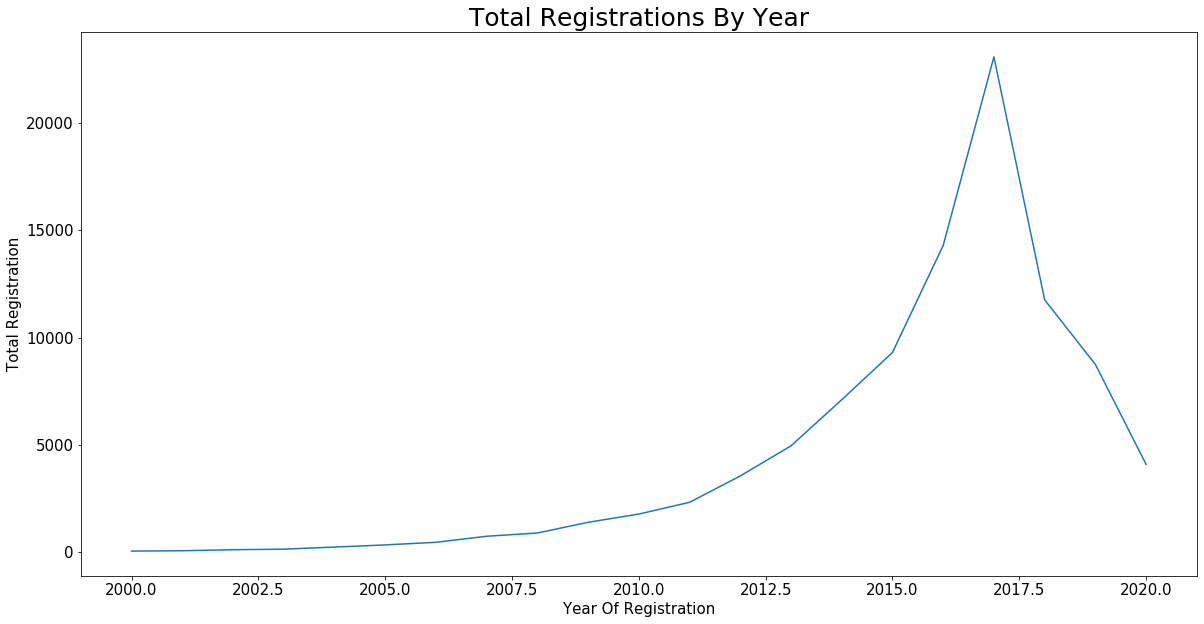

In [97]:
fig,ax = plt.subplots(figsize=(20,10))
plt.title('Total Registrations By Year',size=25)
sns.lineplot(x='year_of_registration',y='Total Registration',data=yearly_registration[yearly_registration['year_of_registration']>=2000])
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('Year Of Registration',size=15)
plt.ylabel('Total Registration',size=15)

Text(0, 0.5, 'Price')

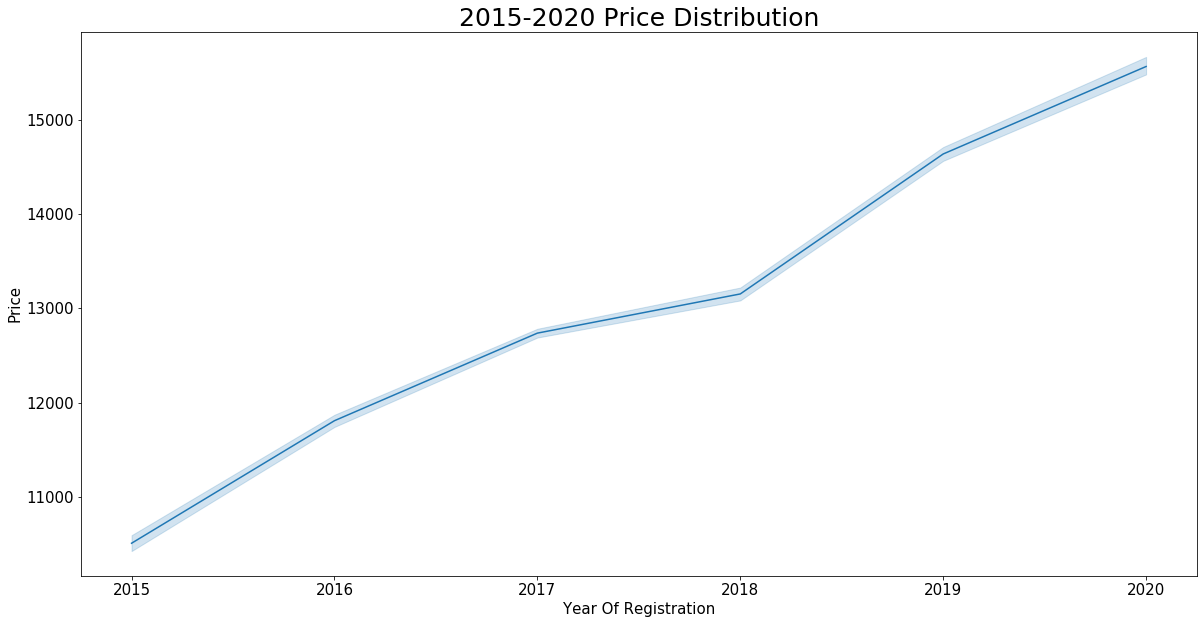

In [98]:
fig,ax = plt.subplots(figsize=(20,10))
sns.lineplot(x='year_of_registration',y='price',data=sample_data[sample_data['year_of_registration']>=2015])
plt.title('2015-2020 Price Distribution',size=25)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('Year Of Registration',size=15)
plt.ylabel('Price',size=15)

Text(0, 0.5, 'Price')

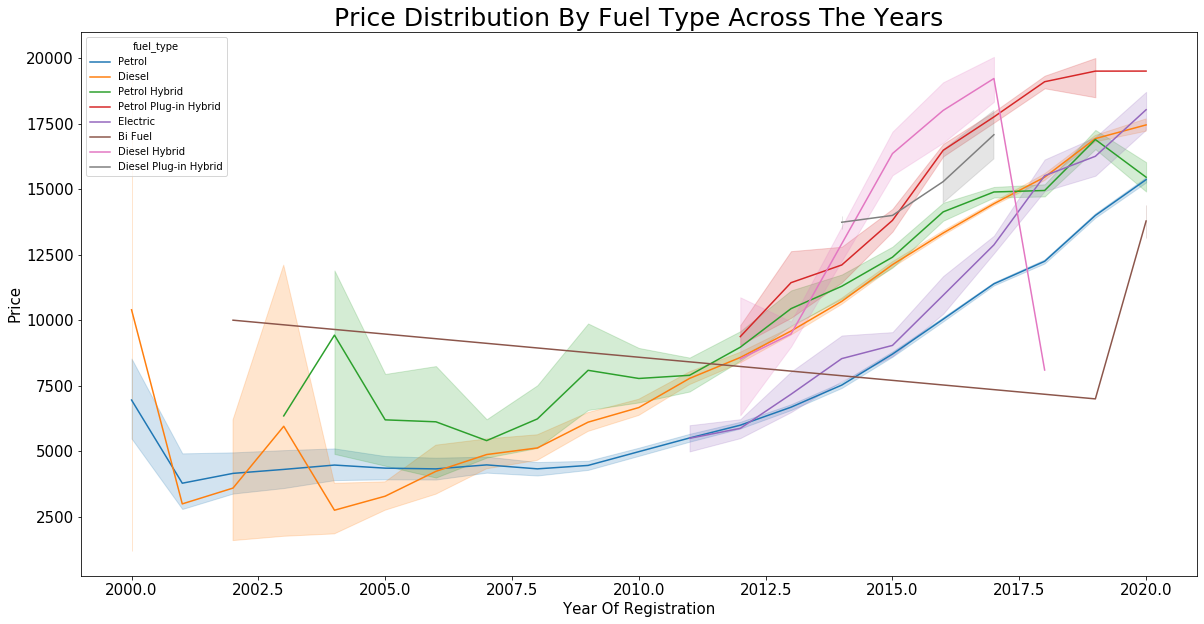

In [99]:
fig,ax = plt.subplots(figsize=(20,10))
plt.title('Price Distribution By Fuel Type Across The Years',size=25)
sns.lineplot(x='year_of_registration',y='price',data=sample_data[sample_data['year_of_registration']>=2000],hue='fuel_type')
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('Year Of Registration',size=15)
plt.ylabel('Price',size=15)

### Most Registered Make and Its Impact

In [100]:
sample_data.pivot_table(index='standard_make',aggfunc={'price':'mean','mileage':'mean'},columns='fuel_type')[:int(0.1*(110))].dropna(axis=1)

mileage         price
fuel_type            Petrol        Petrol
standard_make                            
Abarth         18701.731429  13286.968571
Alfa Romeo     38482.938776   8671.673469
Audi           31983.327687  14546.338795
Austin         54215.500000   6036.250000
BMW            35266.468442  13753.777613
Beauford       22810.000000  15500.000000
Bentley        57468.000000  18726.466667
Cadillac       40322.666667   5415.000000
Chevrolet      48435.102564   2473.666667
Chrysler       47404.875000   4564.187500
Citroen        23155.907534   8578.184503

### Price Range Classes

In [101]:
import scipy.stats as st

In [102]:
st.t.interval(alpha=0.95, df=len(sample_data['price'])-1, loc=np.mean(sample_data['price']), scale=st.sem(sample_data['price']))

(11482.180339118184, 11540.982660881817)

In [103]:
st.norm.interval(alpha=0.95, loc=np.mean(sample_data['price']), scale=st.sem(adverts_data['price']))

(11492.60727818804, 11530.555721811961)

In [104]:
st.t.interval(alpha=0.95, df=len(sample_data['mileage'])-1, loc=np.mean(sample_data['mileage']), scale=st.sem(sample_data['mileage']))

(30343.86721409905, 30587.85574590095)

In [105]:
st.norm.interval(alpha=0.95, loc=np.mean(sample_data['mileage']), scale=st.sem(sample_data['mileage']))

(30343.868690689047, 30587.854269310952)

### One hot encoding

In [128]:
def one_hot_enc(feature,data):
    dummies = pd.get_dummies(data[feature]).add_suffix(feature)
    result = pd.concat([data,dummies],axis=1).drop(feature,axis=1)
    
    return result

### Weight Encoding

In [129]:
def weight_enc(feature,data):
    weights = data[feature].value_counts()/data[feature].value_counts().sum()
    feature_map = dict(weights)
    
    result = data[feature].map(feature_map)
    return result

In [130]:
sample_data = one_hot_enc('fuel_type',sample_data)

In [131]:
sample_data['standard_model'] = weight_enc('standard_model',sample_data)
sample_data['body_type'] = weight_enc('body_type',sample_data)
sample_data['standard_make'] = weight_enc('standard_make',sample_data)
sample_data['standard_colour'] = weight_enc('standard_colour',sample_data)

In [132]:
sample_data = one_hot_enc('crossover_car_and_van',sample_data)
sample_data = one_hot_enc('vehicle_condition',sample_data)

In [133]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 303883 to 313972
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   public_reference                100000 non-null  int64  
 1   mileage                         100000 non-null  float64
 2   reg_code                        96091 non-null   object 
 3   standard_colour                 98997 non-null   float64
 4   standard_make                   100000 non-null  float64
 5   standard_model                  100000 non-null  float64
 6   year_of_registration            95759 non-null   float64
 7   price                           100000 non-null  int64  
 8   body_type                       99865 non-null   float64
 9   Bi Fuelfuel_type                100000 non-null  uint8  
 10  Dieselfuel_type                 100000 non-null  uint8  
 11  Diesel Hybridfuel_type          100000 non-null  uint8  
 12  Diesel Plug

### Check Correlation

In [134]:
corr = adverts_data.corr()
results = corr['price'].sort_values(ascending=False)
pd.DataFrame(results)

price
price                           1.000000
year_of_registration            0.213718
NEWvehicle_condition            0.196193
Dieselfuel_type                 0.189125
Petrol Hybridfuel_type          0.101056
Petrol Plug-in Hybridfuel_type  0.091999
standard_colour                 0.086290
Truecrossover_car_and_van       0.033903
Diesel Hybridfuel_type          0.018556
Electricfuel_type               0.017809
Bi Fuelfuel_type                0.012962
Diesel Plug-in Hybridfuel_type  0.007070
Falsecrossover_car_and_van     -0.033903
public_reference               -0.041748
standard_make                  -0.044145
standard_model                 -0.108545
USEDvehicle_condition          -0.196193
Petrolfuel_type                -0.239711
body_type                      -0.312221
mileage                        -0.414552

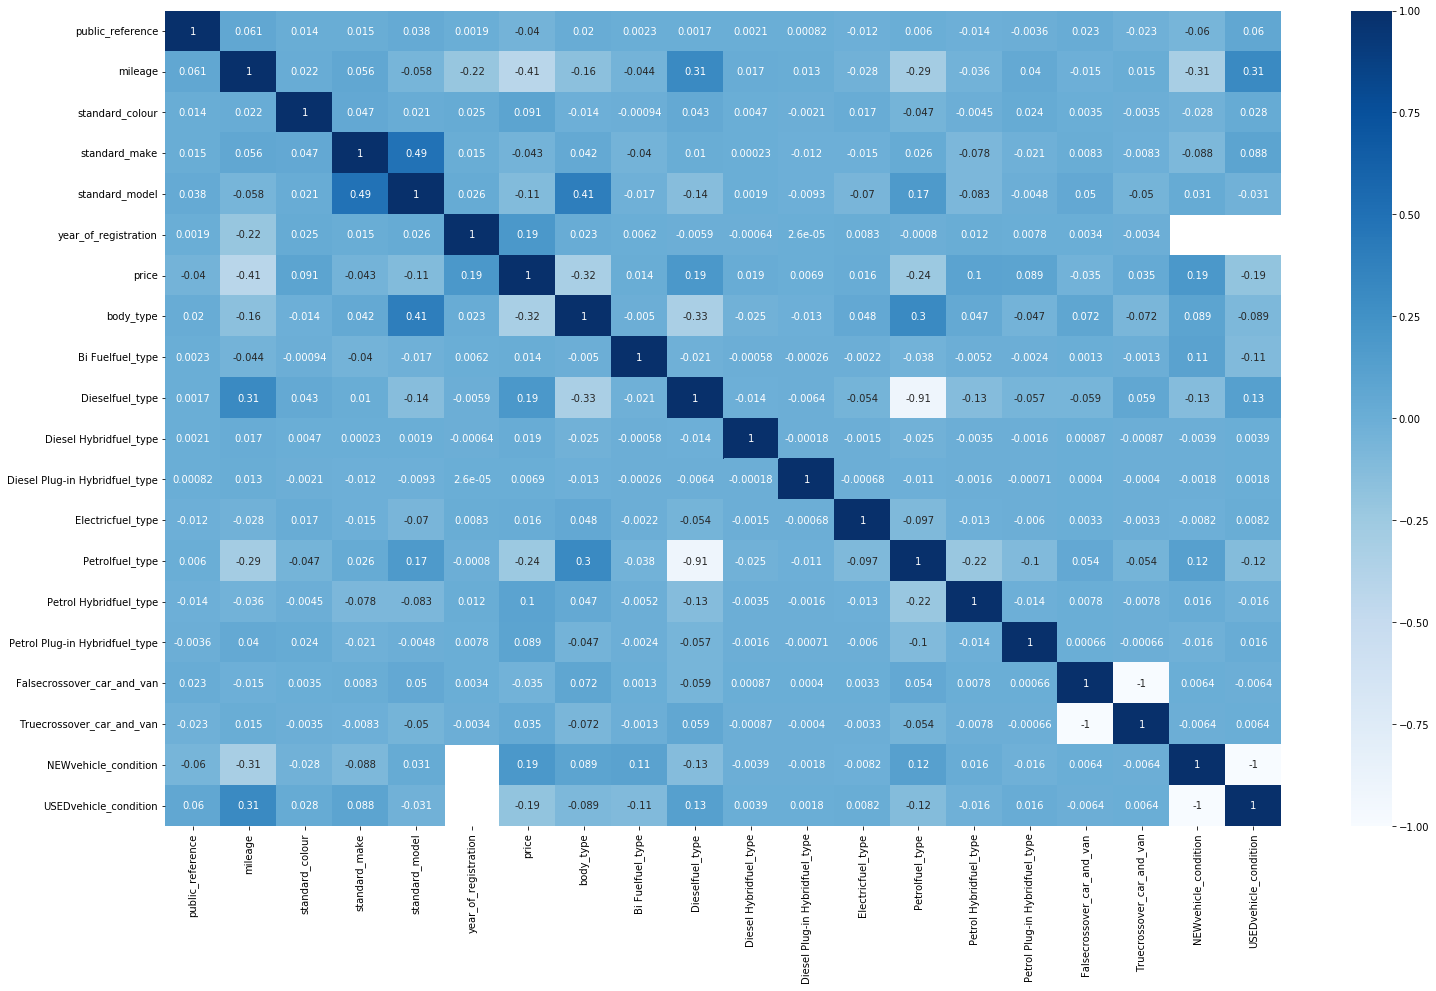

In [135]:
fig,ax= plt.subplots(figsize=(25,15))
sns.heatmap(sample_data.corr(method='pearson'),annot=True,cmap='Blues')

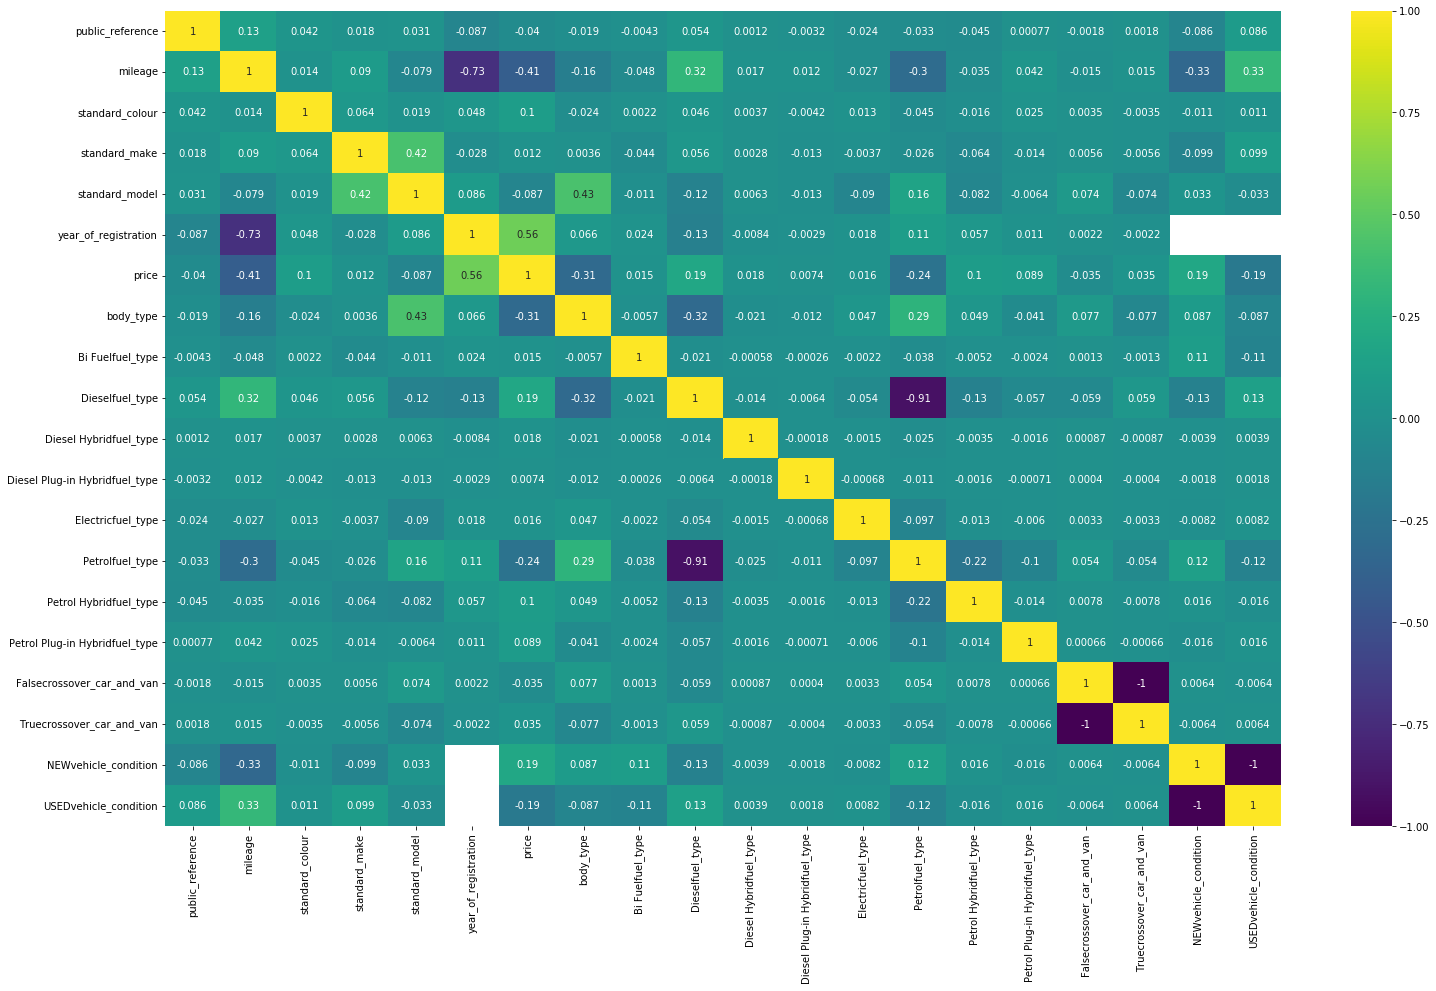

In [136]:
fig,ax= plt.subplots(figsize=(25,15))
sns.heatmap(sample_data.corr(method='spearman'),annot=True,cmap='viridis')

In [137]:
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold,GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.feature_selection import SelectPercentile
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

import lightgbm as lgb
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error,accuracy_score

In [146]:
def data_split(percent,data):
    data = data.drop('reg_code',axis=1)
    shuffled = data.sample(frac=1)
    train = data[int(percent/100 * len(shuffled)):]
    test = data[:int(percent/100 * len(shuffled))]
    
    return train,test

In [147]:
train,test = data_split(20,sample_data)

In [148]:
X = train.drop('price',axis=1)
y = train['price']

In [149]:
test_X = test.drop('price',axis=1)
test_y = test['price']

In [150]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=16)

In [151]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 19), (60000,), (20000, 19), (20000,))

## 89% Accuracy LightGBM Selling Price Prediction Model

In [213]:
lgb_model = lgb.LGBMRegressor(random_state=16,max_depth=12,n_estimator=250,learning_rate=0.3)

In [214]:
lgb_model.fit(X_train,y_train)

[LightGBM] [Warning] Unknown parameter: n_estimator


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.3, max_depth=12,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimator=250, n_estimators=100, n_jobs=-1, num_leaves=31,
              objective=None, random_state=16, reg_alpha=0.0, reg_lambda=0.0,
              silent='warn', subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)

In [215]:
lgb_model.score(X_train,y_train)

0.902455132079323

In [216]:
lgb_model.score(X_test,y_test)

0.8921323190922554

In [217]:
lgb_model.fit(X,y)

[LightGBM] [Warning] Unknown parameter: n_estimator


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.3, max_depth=12,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimator=250, n_estimators=100, n_jobs=-1, num_leaves=31,
              objective=None, random_state=16, reg_alpha=0.0, reg_lambda=0.0,
              silent='warn', subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)

In [218]:
lgb_model.score(test_X,test_y)

0.889241889573207

In [219]:
prediction = lgb_model.predict(test_X)
mean_absolute_error(prediction,test_y)

1158.3296803585679

In [220]:
mean_squared_error(prediction,test_y)

2500616.8614078443